In [17]:
import tensorflow
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
# Importing Deep Learning Libraries
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.utils import plot_model
from keras import regularizers
from tensorflow.keras.utils import plot_model
from keras.preprocessing import image

import numpy as np
import os
import PIL
import tensorflow as tf

from PIL import Image
from keras.preprocessing import image

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

import pathlib

root_dir = "CK+48/"

train_dir = root_dir + '/train/'
test_dir = root_dir + '/test/'

In [18]:


labels = os.listdir(train_dir)
labels





['disgust', 'sadness', 'surprise', 'anger', 'contempt', 'happy', 'fear']

In [19]:
#counting the images in each dataset

file_count = len(list(pathlib.Path(root_dir).glob('*/*/*.png')))
print('Total image count:', file_count)

file_count = len(list(pathlib.Path(train_dir).glob('*/*.png')))
print('Total training images:', file_count)

file_count = len(list(pathlib.Path(test_dir).glob('*/*.png')))
print('Total testing images:', file_count)

Total image count: 981
Total training images: 787
Total testing images: 194


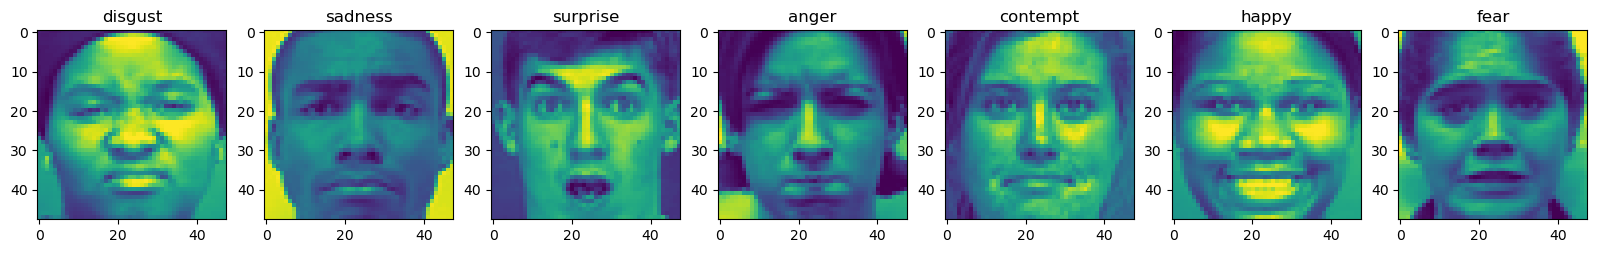

In [26]:
import os
import matplotlib.pyplot as plt

root_dir = "CK+48/"
train_dir = root_dir + 'train/'

# Get the list of labels (emotions)
labels = os.listdir(train_dir)

# Use labels as target_var
target_var = labels

# Create subplots
fig, axes = plt.subplots(1, len(target_var), figsize=(20, 8))

# Loop through each target variable
for i in range(len(target_var)):
    # Get the path to the first image in the corresponding emotion folder
    d = train_dir + target_var[i] + '/' + os.listdir(train_dir + target_var[i] + '/')[0]
    
    # Show the image and set the title
    axes[i].imshow(plt.imread(d))
    axes[i].set_title(target_var[i])

plt.show()


/tmp/ipykernel_21291/3457566961.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout() #format images


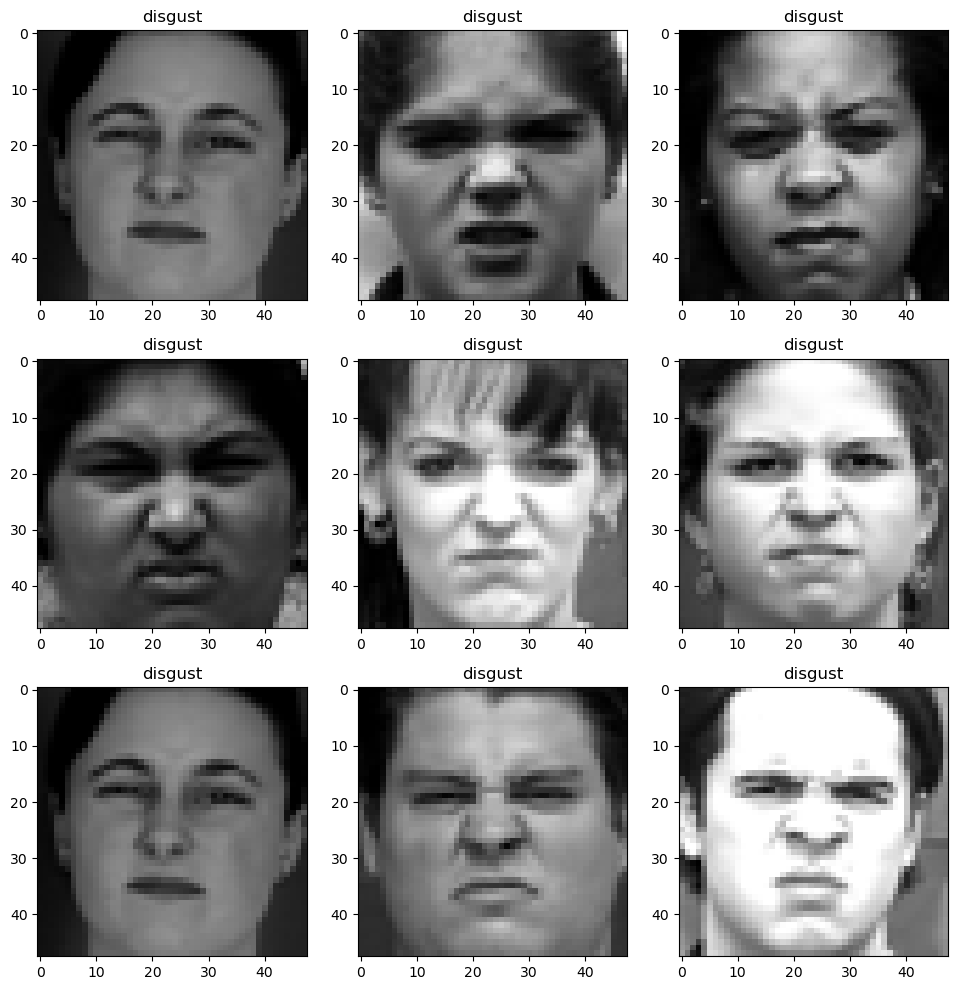

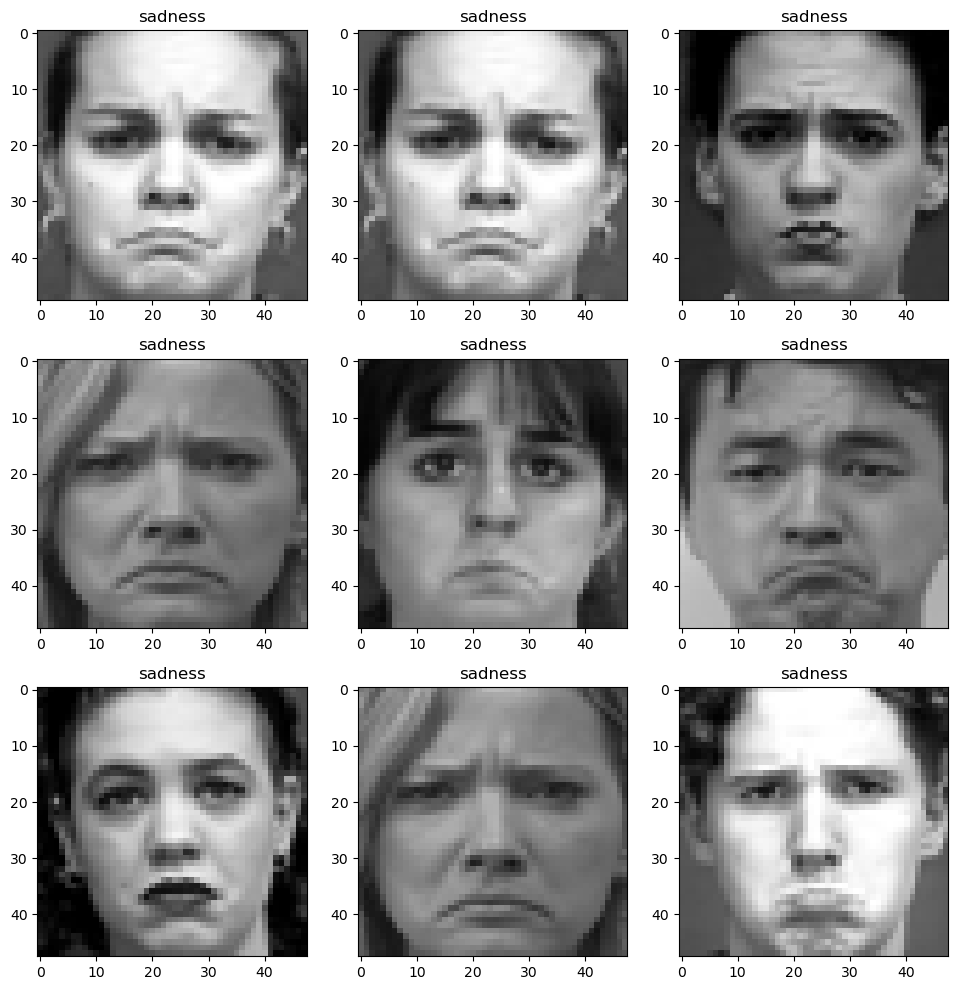

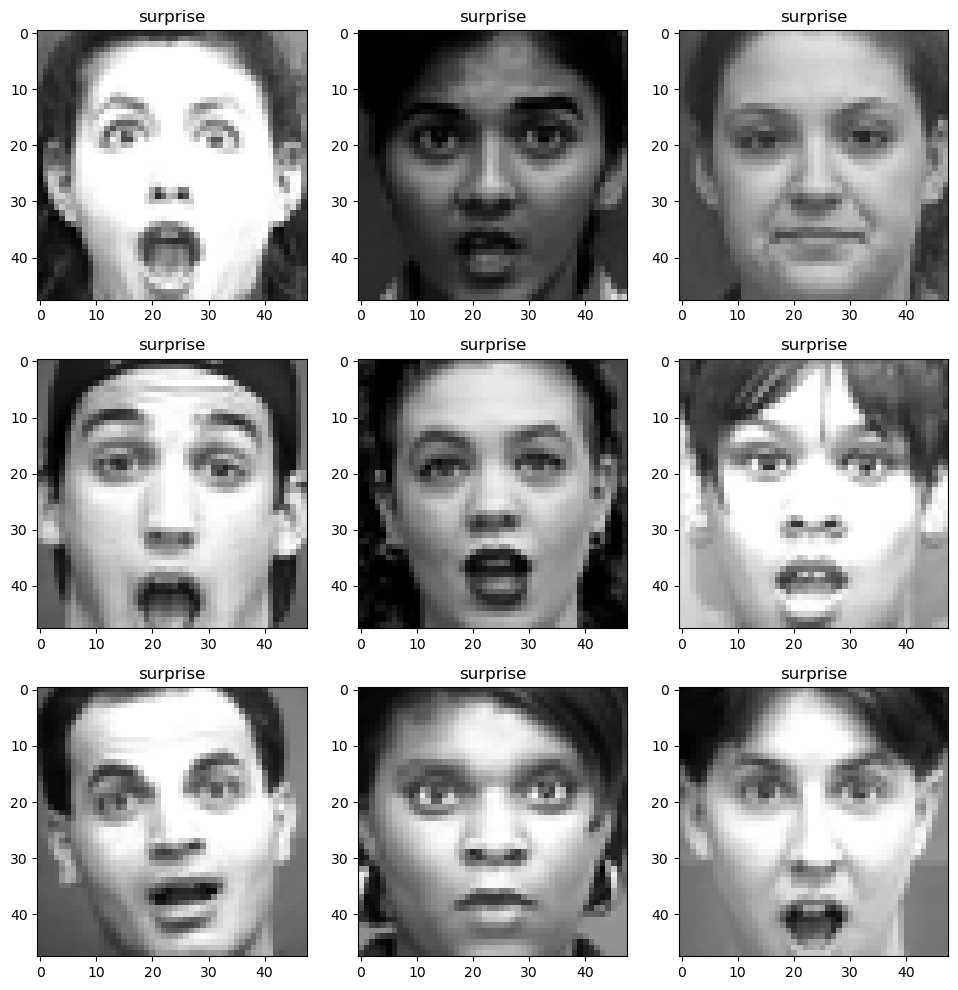

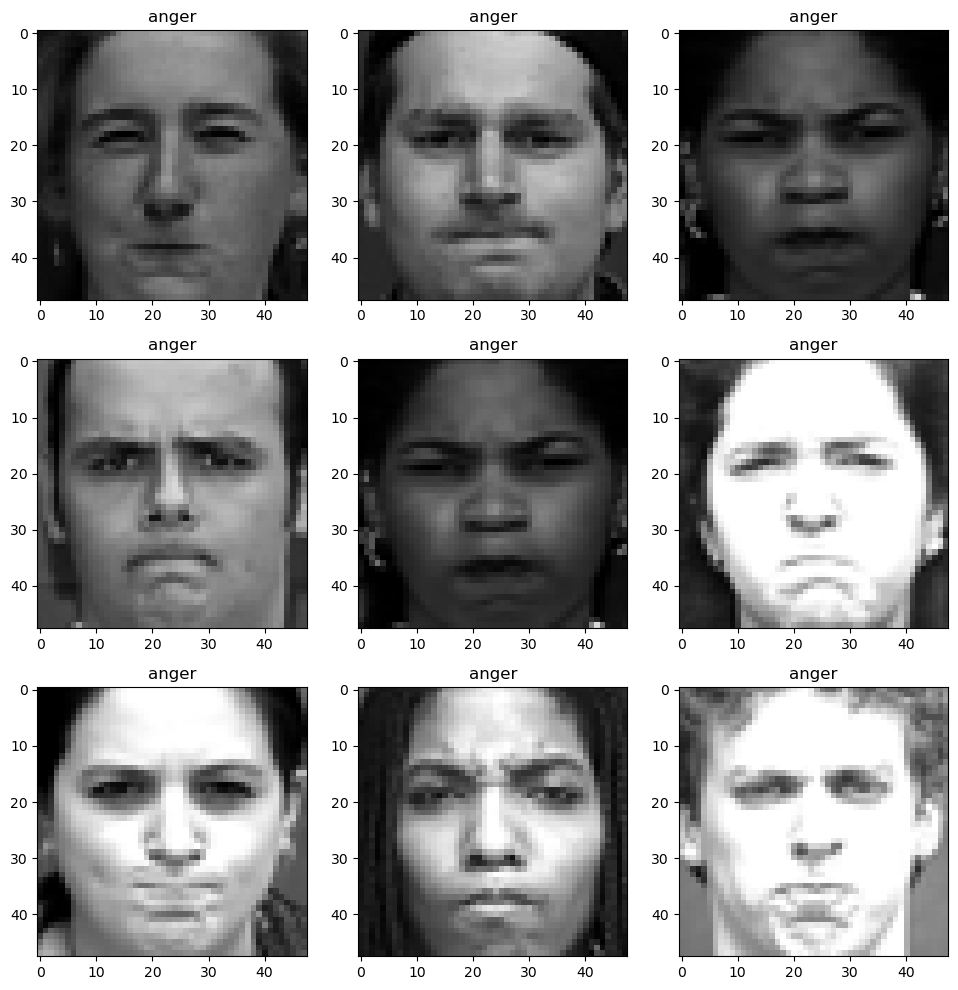

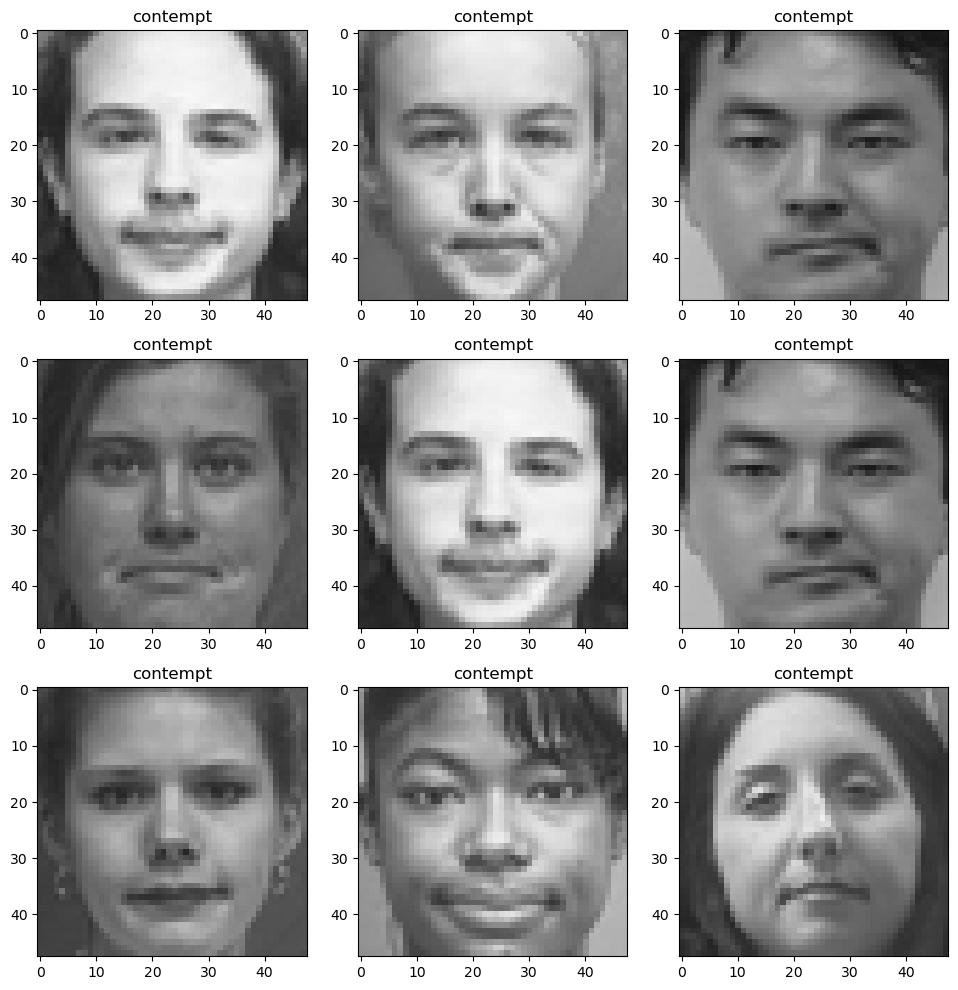

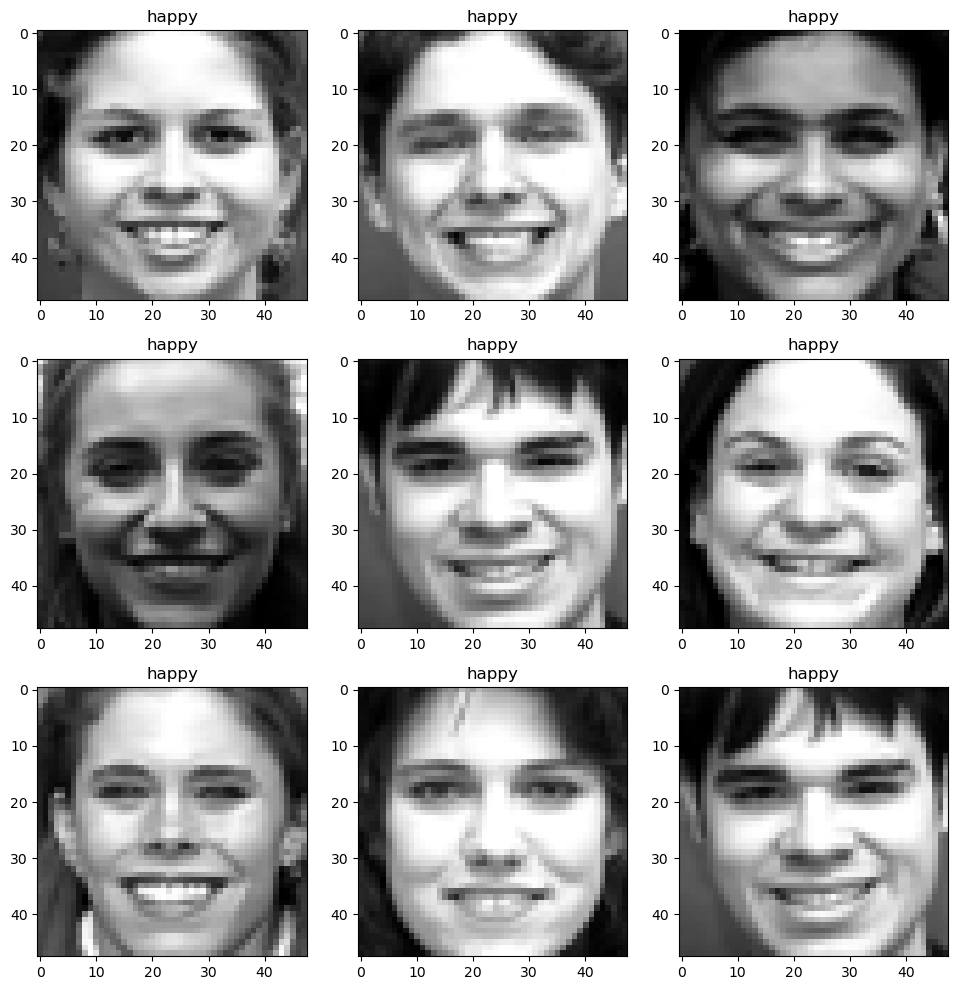

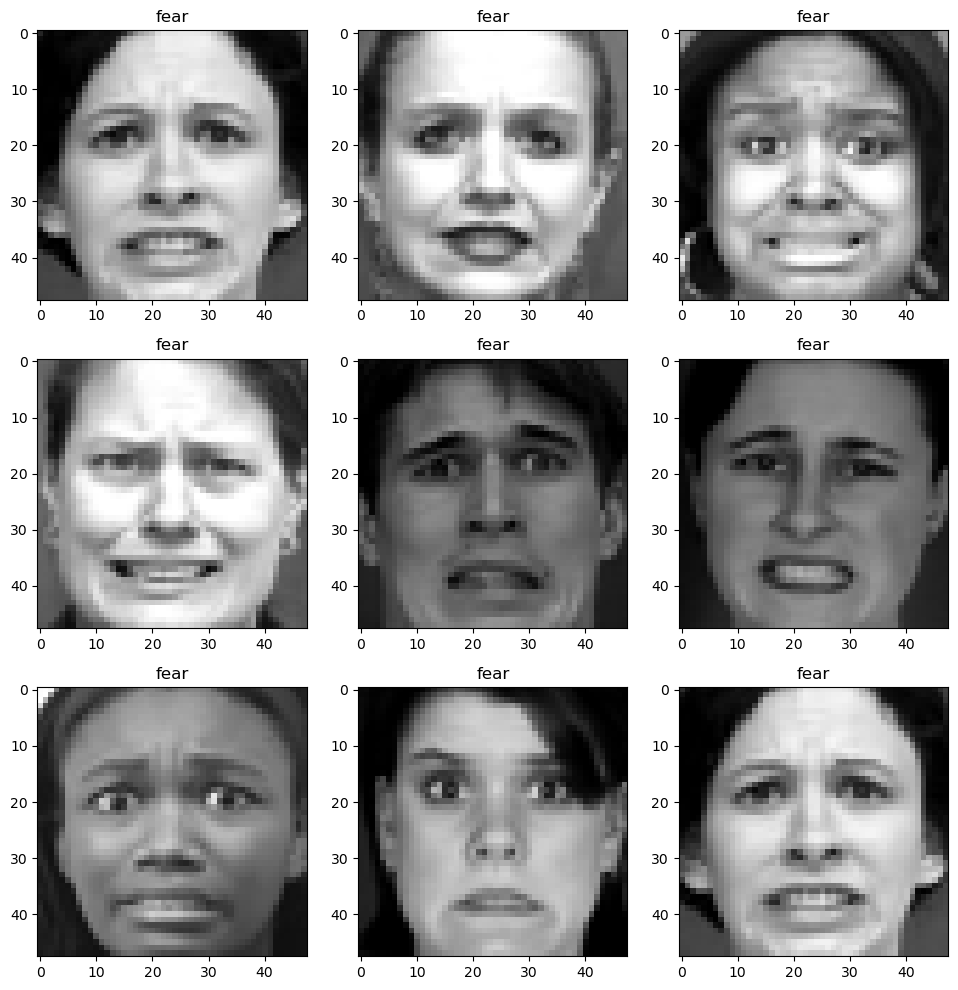

In [27]:
def display_images(emotion):
    plt.figure(figsize=(10,10))
    for i in range(1, 10, 1):
        plt.subplot(3,3,i) #Form a 3x3 grid for each label
        img = image.load_img(train_dir + '/' + emotion + "/" + os.listdir(train_dir + '/' + emotion)[i], target_size=(48, 48)) #load images
        plt.title(emotion) #display image label
        plt.imshow(img) #display image
        plt.tight_layout() #format images
    plt.show()

for i in os.listdir(train_dir):
    display_images(i)

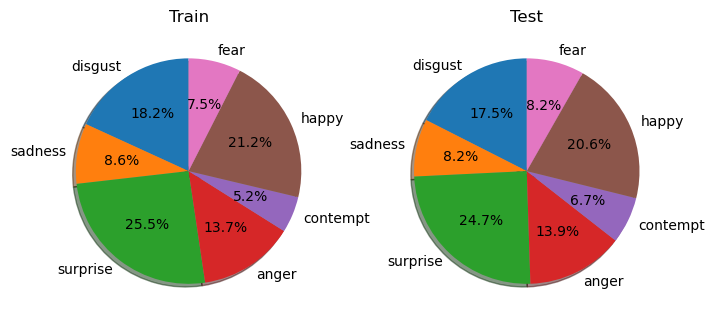

Emotion : disgust
	Training : 143
	 Testing : 34
Emotion : sadness
	Training : 68
	 Testing : 16
Emotion : surprise
	Training : 201
	 Testing : 48
Emotion : anger
	Training : 108
	 Testing : 27
Emotion : contempt
	Training : 41
	 Testing : 13
Emotion : happy
	Training : 167
	 Testing : 40
Emotion : fear
	Training : 59
	 Testing : 16


In [28]:
x_train = np.array([ len(os.listdir(train_dir+i+'/')) for i in target_var ])
x_test = np.array([ len(os.listdir(test_dir+i+'/')) for i in target_var ])
label = target_var
  
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].pie(x_train, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
axes[1].pie(x_test, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
axes[0].set_title('Train')
axes[1].set_title('Test')
plt.show()

for i in target_var:
    print('Emotion : ' + i )
    print('\tTraining : ' + str(len(os.listdir(train_dir+i+'/'))) +'\n\t Testing : ' + str(len(os.listdir(test_dir+i+'/'))))


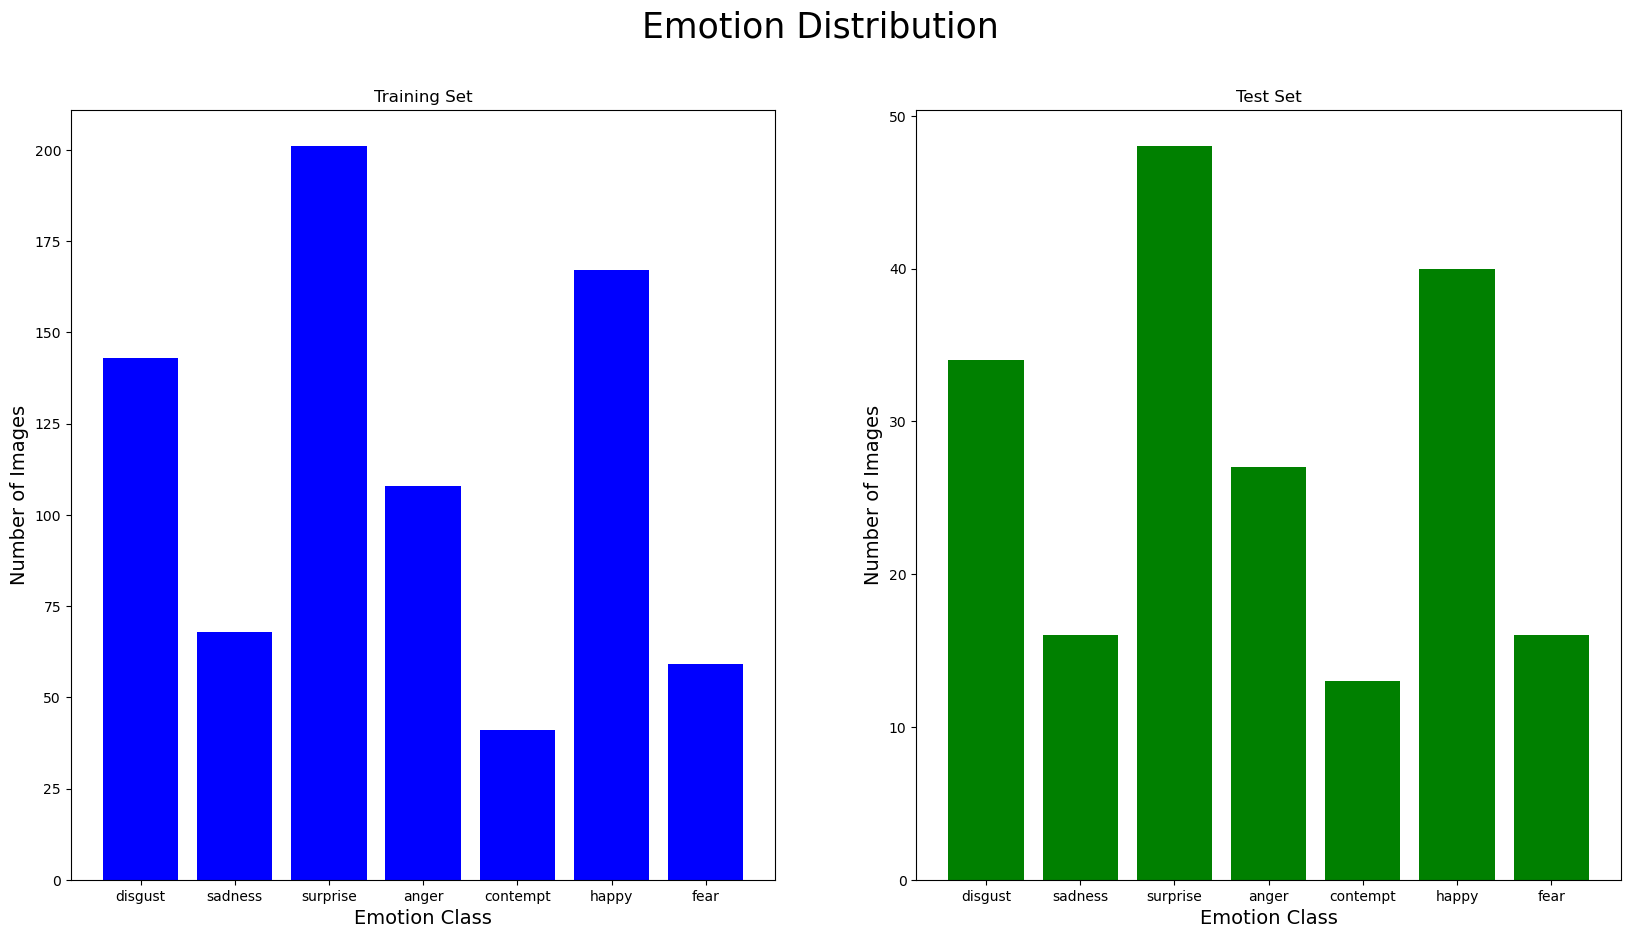

In [29]:
#bar charts
train_dist = np.array([len(os.listdir(train_dir+i+'/')) for i in labels])
test_dist = np.array([len(os.listdir(test_dir+i+'/')) for i in labels])
x = labels

plt.figure(figsize=(20,10))
plt.suptitle('Emotion Distribution', fontsize=25)

ax1 = plt.subplot(1,2,1)
ax1.set_title('Training Set')
plt.xlabel('Emotion Class', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.bar(x, train_dist, color='blue')

ax2 = plt.subplot(1, 2, 2)
ax2.set_title('Test Set')
plt.xlabel('Emotion Class', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.bar(x, test_dist, color='green')
plt.show()

In [41]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   zoom_range= 0.2,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1.0/255)

#Read our images to the data augmentations
#Generates batches of augmented data
train = train_datagen.flow_from_directory(train_dir,
                                          subset='training',
                                          color_mode = 'rgb',
                                          target_size = (48, 48),
                                          batch_size = 64,
                                          shuffle=True,
                                          class_mode = 'categorical')

valid = train_datagen.flow_from_directory(train_dir,
                                          subset='validation',
                                          color_mode = 'rgb',
                                          target_size = (48, 48),
                                          batch_size = 64,
                                          shuffle=True,
                                          class_mode = 'categorical')

test = test_datagen.flow_from_directory(test_dir,
                                        color_mode = 'rgb',
                                        target_size = (48, 48),
                                        batch_size = 64,
                                        shuffle=False,
                                        class_mode = 'categorical')

Found 633 images belonging to 7 classes.
Found 154 images belonging to 7 classes.
Found 194 images belonging to 7 classes.


In [42]:
train.class_indices


{'anger': 0,
 'contempt': 1,
 'disgust': 2,
 'fear': 3,
 'happy': 4,
 'sadness': 5,
 'surprise': 6}

In [43]:
test.class_indices

{'anger': 0,
 'contempt': 1,
 'disgust': 2,
 'fear': 3,
 'happy': 4,
 'sadness': 5,
 'surprise': 6}

# MODEL CREATION

In [45]:
#model vgg19

from keras.applications.vgg19 import VGG19
conv_base = VGG19(
    weights='imagenet',
    include_top = False,
    input_shape=(48,48,3)
)

conv_base.summary()

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))

model.add(Dense(7, activation='softmax'))

model.summary()


Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

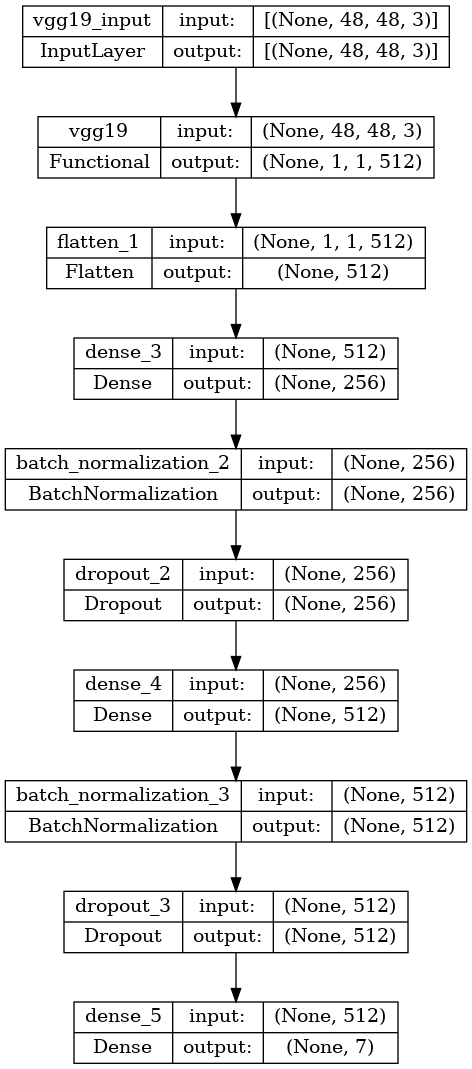

In [80]:
# to save model you need pip install pydot, and sudo apt-get install graphviz



from keras.utils import plot_model

# Assuming 'model' is your Keras model
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)


In [46]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
model_1 = model.fit(train, validation_data=valid, epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 60ms/step - loss: 0.4605 - accuracy: 0.8199 - val_loss: 1.9504 - val_accuracy: 0.2532
Epoch 2/100
10/10 [==============================] - 1s 56ms/step - loss: 0.3352 - accuracy: 0.8720 - val_loss: 1.8295 - val_accuracy: 0.3052
Epoch 3/100
10/10 [==============================] - 1s 56ms/step - loss: 0.3197 - accuracy: 0.8926 - val_loss: 1.6631 - val_accuracy: 0.2987
Epoch 4/100
10/10 [==============================] - 1s 56ms/step - loss: 0.2978 - accuracy: 0.9036 - val_loss: 1.7697 - val_accuracy: 0.4286
Epoch 5/100
10/10 [==============================] - 1s 69ms/step - loss: 0.2665 - accuracy: 0.9068 - val_loss: 1.5136 - val_accuracy: 0.3442
Epoch 6/100
10/10 [==============================] - 1s 58ms/step - loss: 0.2179 - accuracy: 0.9258 - val_loss: 1.1842 - val_accuracy: 0.5714
Epoch 7/100
10/10 [==============================] - 1s 61ms/step - loss: 0.1929 - accuracy: 0.9463 - val_loss: 1.5022 - val_accuracy: 0.3831
Epoch 

10/10 [==============================] - 1s 61ms/step - loss: 0.0134 - accuracy: 0.9968 - val_loss: 0.5140 - val_accuracy: 0.8312
Epoch 59/100
10/10 [==============================] - 1s 64ms/step - loss: 0.0102 - accuracy: 0.9984 - val_loss: 0.6084 - val_accuracy: 0.8506
Epoch 60/100
10/10 [==============================] - 1s 61ms/step - loss: 0.0084 - accuracy: 0.9984 - val_loss: 1.3880 - val_accuracy: 0.7208
Epoch 61/100
10/10 [==============================] - 1s 57ms/step - loss: 0.0118 - accuracy: 0.9968 - val_loss: 1.3482 - val_accuracy: 0.6818
Epoch 62/100
10/10 [==============================] - 1s 57ms/step - loss: 0.0125 - accuracy: 0.9968 - val_loss: 0.9094 - val_accuracy: 0.7792
Epoch 63/100
10/10 [==============================] - 1s 57ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.3185 - val_accuracy: 0.9221
Epoch 64/100
10/10 [==============================] - 1s 63ms/step - loss: 0.0171 - accuracy: 0.9953 - val_loss: 3.1782 - val_accuracy: 0.5130
Epoch 65/100

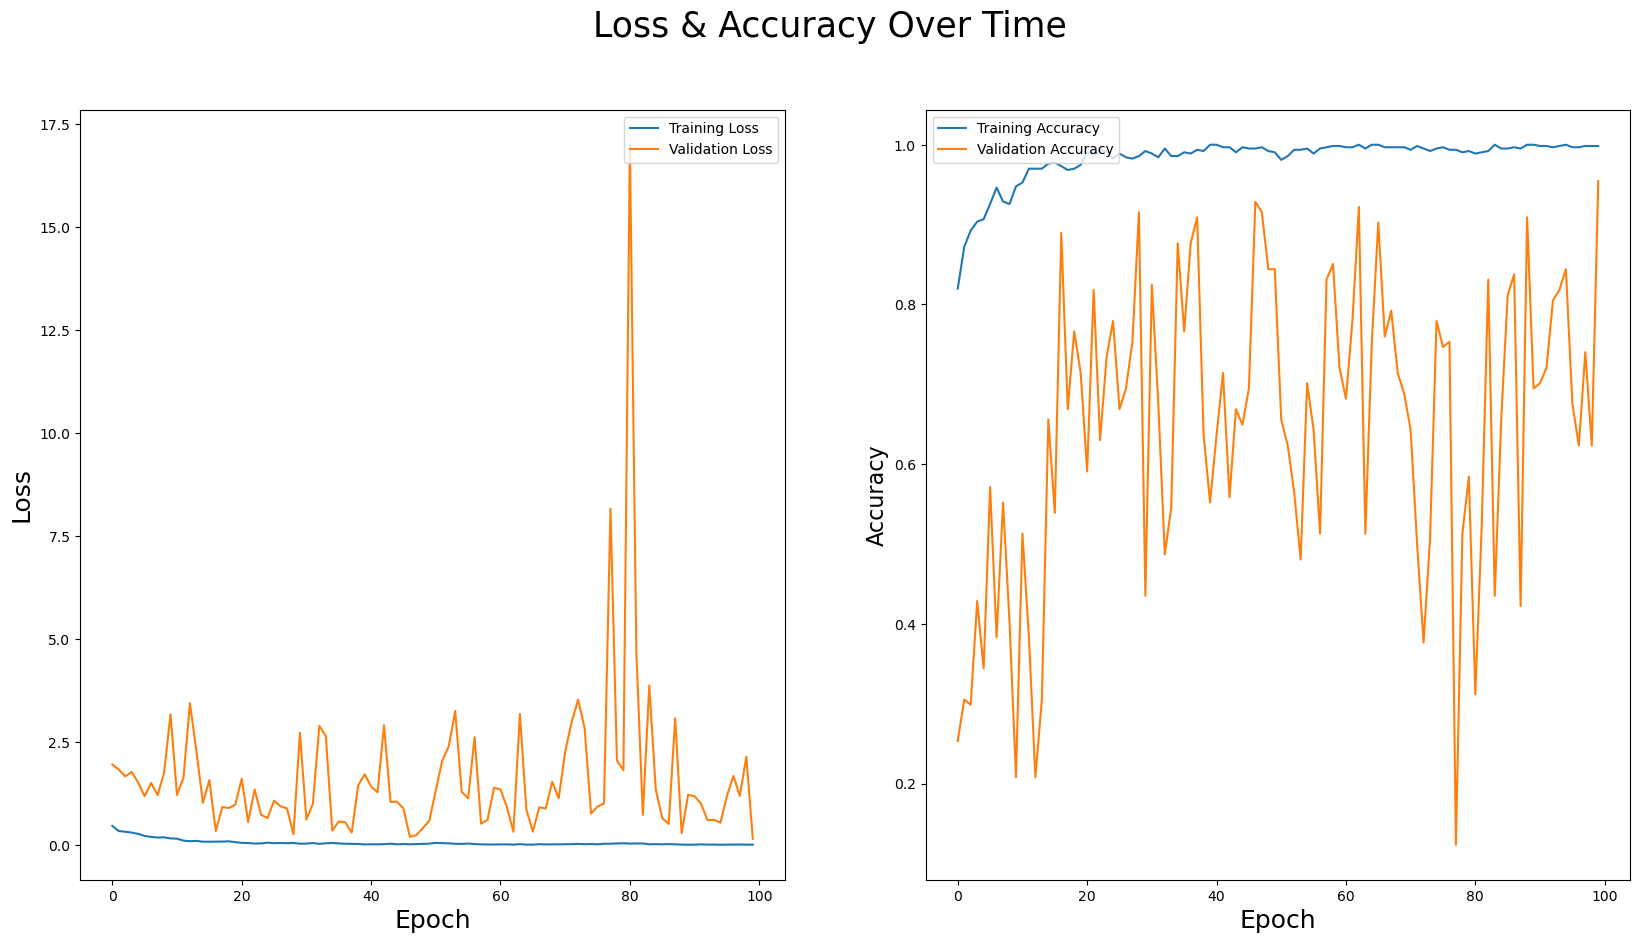

In [49]:
plt.figure(figsize=(20,10))
plt.suptitle('Loss & Accuracy Over Time', fontsize=25)

plt.subplot(1, 2, 1)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.plot(model_1.history['loss'], label='Training Loss')
plt.plot(model_1.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(model_1.history['accuracy'], label='Training Accuracy')
plt.plot(model_1.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='upper left')
plt.show()

In [50]:
y_pred = model.predict(test)

4/4 [==============================] - 0s 61ms/step


In [51]:
y_pred_labels = []
for i in y_pred:
    y_pred_labels.append(np.argmax(i))

In [52]:
y_actual = test.classes[test.index_array]

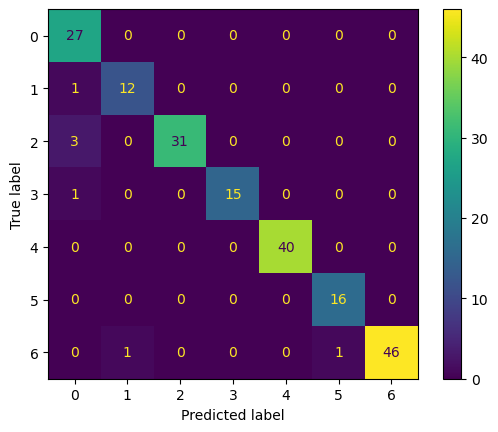

In [54]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual, y_pred_labels, digits=4))


              precision    recall  f1-score   support

           0     0.8438    1.0000    0.9153        27
           1     0.9231    0.9231    0.9231        13
           2     1.0000    0.9118    0.9538        34
           3     1.0000    0.9375    0.9677        16
           4     1.0000    1.0000    1.0000        40
           5     0.9412    1.0000    0.9697        16
           6     1.0000    0.9583    0.9787        48

    accuracy                         0.9639       194
   macro avg     0.9583    0.9615    0.9583       194
weighted avg     0.9682    0.9639    0.9645       194



In [55]:
train_loss, train_acc = model.evaluate(train)
test_loss, test_acc = model.evaluate(test)

4/4 [==============================] - 0s 14ms/step - loss: 0.0687 - accuracy: 0.9639


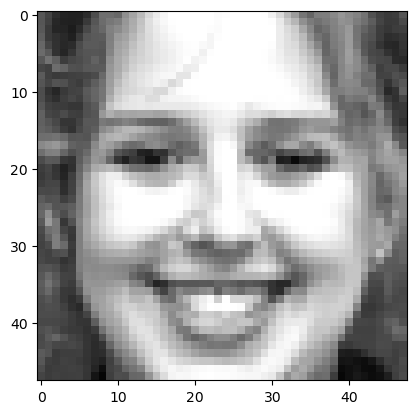

In [71]:


#checfking the example pic of surperised with the current model
img = image.load_img('h1.png', 
                     target_size=(48,48),color_mode='rgb')
img = np.array(img)
plt.imshow(img)



In [72]:
# Preprocess the image for prediction
img = np.expand_dims(img, axis=0)  # Reshapes to 1, 48, 48, 3
result = model.predict(img)  # Use the model to predict the emotion of the image
result = list(result[0])

1/1 [==============================] - 0s 12ms/step


In [73]:
print(result)
print(train.class_indices)

[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
{'anger': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'sadness': 5, 'surprise': 6}


In [74]:
img_index = result.index(max(result))
print('Prediction:',labels[img_index])

Prediction: contempt


In [ ]:
second prediction

1/1 [==============================] - 0s 14ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
{'anger': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'sadness': 5, 'surprise': 6}
Prediction: contempt


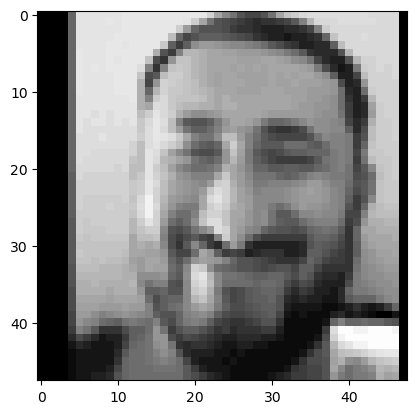

In [75]:


#checfking the example pic of surperised with the current model
img = image.load_img('happy1.png', 
                     target_size=(48,48),color_mode='rgb')
img = np.array(img)
plt.imshow(img)

# Preprocess the image for prediction
img = np.expand_dims(img, axis=0)  # Reshapes to 1, 48, 48, 3
result = model.predict(img)  # Use the model to predict the emotion of the image
result = list(result[0])
print(result)
print(train.class_indices)
img_index = result.index(max(result))
print('Prediction:',labels[img_index])

1/1 [==============================] - 0s 13ms/step
Prediction: contempt


<BarContainer object of 7 artists>

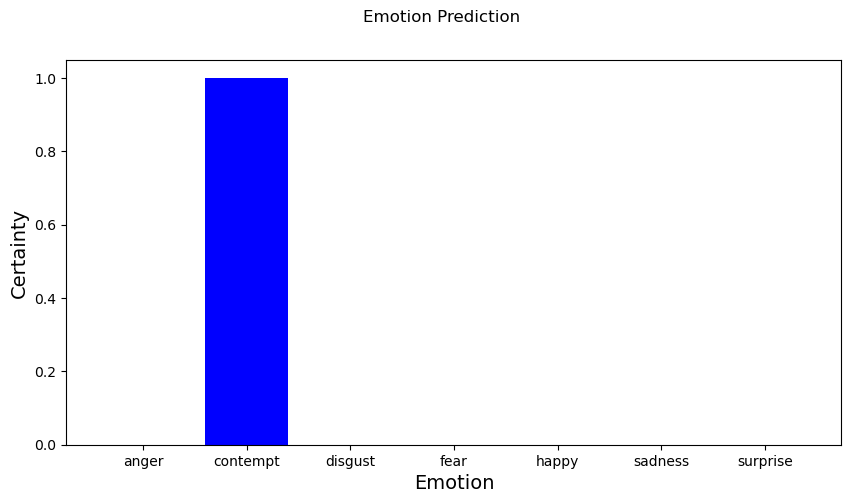

In [77]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,3)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')